# C7.1
Jeg Vet

huangzw29@mail2.sysu.edu.cn

2022-04-04

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp

## AM

In [2]:
def smoothplot(df, par, dense=50, s=1, method="Rbf", scatter=True, 
               xlab="x", ylab="y", result_path="Output/smooth.png"):
    '''
    df: dataframe
    par: {"x": "", "y": ""}
    dense: how many points
    method: "Rbf" or "UnivariateSpline"
    s: smooth degree
    '''
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.interpolate import UnivariateSpline,Rbf
    # smooth
    x_dense = np.linspace(df[par["x"]].min(), df[par["x"]].max(), dense)
    if method == "Rbf":
        smoothfunc = Rbf(df[par["x"]], df[par["y"]], smooth=s)
        smooth = smoothfunc(x_dense)
    elif method == "UnivariateSpline":
        smoothfunc = UnivariateSpline(df[par["x"]], df[par["y"]], s=s)
        smooth = smoothfunc(x_dense)
    # Plot
    plt.figure(figsize= (9, 6))
 
    ## lab
    if xlab == "x":
        xlab = par["x"]
    if ylab == "y":
        ylab = par["y"]
    ## Scatter
    if scatter == True:     
        plt.scatter(df[par["x"]], df[par["y"]], color='lightcoral')
    ## Smooth
    plt.plot(x_dense, smooth, color='lightseagreen')               
    # Background
    extent = [-5, 255, -1, 23]
    xv, _ = np.meshgrid(np.linspace(0,1,210), np.linspace(0,1,90))
    plt.imshow(xv, cmap=plt.cm.cool, origin='lower',alpha = 0.3, aspect = 'auto',
            extent = extent)  
    ## Lab
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    # plt.title(y=-0.17)
    plt.savefig(result_path, bbox_inches = 'tight', dpi=300) 

In [3]:
df1 = pd.read_csv('Input/AM.csv')

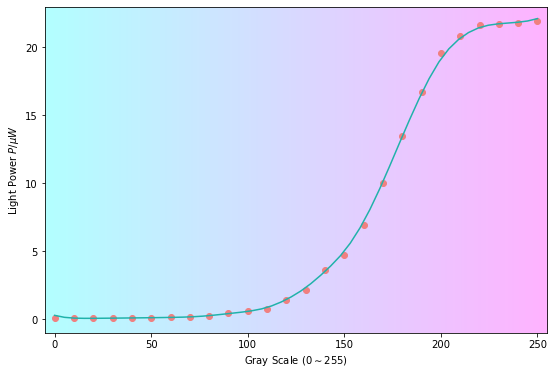

In [4]:
smoothplot(df1, {"x": "GrayScale", "y": "Power"}, dense=50, s=0.5, method="Rbf", scatter=True, 
           xlab="Gray Scale ($0 \sim 255$)", ylab="Light Power $P/\mu W$", result_path="Output/AM.png")

## Distortion

In [3]:
df_par = pd.read_csv('Input/Par.csv')
par = dict(zip(df_par["Par"], df_par["Val"]))
par["A_hx_pergrid"] = par["Checker_x_p"]*par["SLM_d"]/par["Checker_A_x_g"] # x-orientation Side length per grid of Checker A
par["A_hy_pergrid"] = par["Checker_y_p"]*par["SLM_d"]/par["Checker_A_y_g"] # y-orientation Side length per grid of Checker A

par["B_hx_pergrid"] = par["Checker_x_p"]*par["SLM_d"]/par["Checker_B_x_g"] # x-orientation Side length per grid of Checker B
par["B_hy_pergrid"] = par["Checker_y_p"]*par["SLM_d"]/par["Checker_B_y_g"] # y-orientation Side length per grid of Checker B
par

{'Checker_x_p': 1024.0,
 'Checker_y_p': 768.0,
 'Checker_A_x_g': 8.0,
 'Checker_A_y_g': 6.0,
 'Checker_B_x_g': 64.0,
 'Checker_B_y_g': 48.0,
 'SLM_d': 26.0,
 'CCD_d': 3.2,
 'A_hx_pergrid': 3328.0,
 'A_hy_pergrid': 3328.0,
 'B_hx_pergrid': 416.0,
 'B_hy_pergrid': 416.0}

In [4]:
df2 = pd.read_csv('Input/Distortion.csv')

# ideal image height 
df2["X_h1"] = df2.apply(lambda x: x.X_g*par["A_hx_pergrid"]*x.beta if x.Checker == "A" else x.X_g*par["B_hx_pergrid"]*x.beta, axis=1) # X-orientation ideal image height 
df2["Y_h1"] = df2.apply(lambda x: x.Y_g*par["A_hy_pergrid"]*x.beta if x.Checker == "A" else x.Y_g*par["B_hy_pergrid"]*x.beta, axis=1) # Y-orientation ideal image height

df2["XY_h1x"] = df2.apply(lambda x: x.XY_g*par["A_hx_pergrid"]*x.beta if x.Checker == "A" else x.XY_g*par["B_hx_pergrid"]*x.beta, axis=1) # XY-orientation ideal image height (x comp.)
df2["XY_h1y"] = df2.apply(lambda x: x.XY_g*par["A_hy_pergrid"]*x.beta if x.Checker == "A" else x.XY_g*par["B_hy_pergrid"]*x.beta, axis=1) # XY-orientation ideal image height (y comp.)

# actual image height
df2["X_h2"] = (df2["X_x_p"]-df2["Center_x_p"])*par["CCD_d"] # X-orientation actual image height 
df2["Y_h2"] = -(df2["Y_y_p"]-df2["Center_y_p"])*par["CCD_d"] # Y-orientation actual image height

df2["XY_h2x"] = (df2["XY_x_p"]-df2["Center_x_p"])*par["CCD_d"] # XY-orientation actual image height (x comp.)
df2["XY_h2y"] = -(df2["XY_y_p"]-df2["Center_y_p"])*par["CCD_d"] # XY-orientation actual image height (y comp.)

# Diff
df2["X_dh"] = df2["X_h2"].abs() - df2["X_h1"].abs() # X-orientation Diff 
df2["Y_dh"] = df2["Y_h2"].abs() - df2["Y_h1"].abs() # Y-orientation Diff

df2["XY_dhx"] = df2["XY_h2x"].abs() - df2["XY_h1x"].abs() # XY-orientation Diff (x comp.)
df2["XY_dhy"] = df2["XY_h2y"].abs() - df2["XY_h1y"].abs() # XY-orientation Diff (y comp.)

# Distortion q
df2["X_q"] = (df2["X_dh"]/df2["X_h1"]).map(lambda x:format(x, '.2%')) # X-orientation Distortion q
df2["Y_q"] = (df2["Y_dh"]/df2["Y_h1"]).map(lambda x:format(x, '.2%')) # Y-orientation Distortion q

df2["XY_qx"] = (df2["XY_dhx"]/df2["XY_h1x"]).map(lambda x:format(x, '.2%')) # XY-orientation Distortion q (x comp.)
df2["XY_qy"] = (df2["XY_dhy"]/df2["XY_h1y"]).map(lambda x:format(x, '.2%')) # XY-orientation Distortion q (y comp.)

df2["theta"] = df2["X_h1"]*df2["beta"]/df2["s2"]

In [5]:
df2

,Lab,Checker,f,beta,s1,s2,X_g,Y_g,XY_g,Center_x_p,...,XY_h2y,X_dh,Y_dh,XY_dhx,XY_dhy,X_q,Y_q,XY_qx,XY_qy,theta
0,150_4,A,150,0.250,750,187.50,2,2,1.5,984,...,1222.4,3.200,22.400,0.000,-25.600,0.19%,1.35%,0.00%,-2.05%,2.218667
1,70_4,A,70,0.250,350,87.50,2,2,1.5,1089,...,1379.2,169.600,176.000,131.200,131.200,10.19%,10.58%,10.51%,10.51%,4.754286
2,50_4,A,50,0.250,250,62.50,2,2,1.5,1085,...,1376.0,246.400,124.800,182.400,128.000,14.81%,7.50%,14.62%,10.26%,6.656000
3,70_2,A,70,0.500,210,105.00,1,1,1.0,1054,...,1683.2,-57.600,-32.000,-38.400,19.200,-3.46%,-1.92%,-2.31%,1.15%,7.923810
4,70_6,A,70,0.166,490,81.64,2,2,1.5,1061,...,956.8,191.104,95.104,150.528,128.128,17.30%,8.61%,18.16%,15.46%,2.246604
5,48x64_2X,B,70,2.000,210,105.00,2,2,1.5,977,...,1344.0,140.800,137.600,83.200,96.000,8.46%,8.27%,6.67%,7.69%,31.695238
6,48x64_4X,B,70,4.000,350,87.50,1,1,1.0,1071,...,1222.4,-422.400,-441.600,-422.400,-441.600,-25.38%,-26.54%,-25.38%,-26.54%,76.068571


In [6]:
df2[["Lab", "X_dh", "Y_dh", "XY_dhx", "XY_dhy", "X_q", "Y_q", "XY_qx", "XY_qy"]]

,Lab,X_dh,Y_dh,XY_dhx,XY_dhy,X_q,Y_q,XY_qx,XY_qy
0,150_4,3.200,22.400,0.000,-25.600,0.19%,1.35%,0.00%,-2.05%
1,70_4,169.600,176.000,131.200,131.200,10.19%,10.58%,10.51%,10.51%
2,50_4,246.400,124.800,182.400,128.000,14.81%,7.50%,14.62%,10.26%
3,70_2,-57.600,-32.000,-38.400,19.200,-3.46%,-1.92%,-2.31%,1.15%
4,70_6,191.104,95.104,150.528,128.128,17.30%,8.61%,18.16%,15.46%
5,48x64_2X,140.800,137.600,83.200,96.000,8.46%,8.27%,6.67%,7.69%
6,48x64_4X,-422.400,-441.600,-422.400,-441.600,-25.38%,-26.54%,-25.38%,-26.54%


In [8]:
df2.to_csv('Output/Distortion.csv', index=False)

In [11]:
df2.to_latex('Output/Distortion-latex.txt', index=False)

In [13]:
df3 = df2[["f", "beta", "s1", "s2", "X_h1",  "X_q", "Y_q", "XY_qx", "XY_qy"]].copy()
df3["theta"] = df3["X_h1"]*df3["beta"]/df3["s2"]
df3[["f", "beta", "s2", "theta", "X_h1",  "X_q", "Y_q", "XY_qx", "XY_qy"]]

,f,beta,s2,theta,X_h1,X_q,Y_q,XY_qx,XY_qy
0,150,0.250,187.50,2.218667,1664.000,0.19%,1.35%,0.00%,-2.05%
1,70,0.250,87.50,4.754286,1664.000,10.19%,10.58%,10.51%,10.51%
2,50,0.250,62.50,6.656000,1664.000,14.81%,7.50%,14.62%,10.26%
3,70,0.500,105.00,7.923810,1664.000,-3.46%,-1.92%,-2.31%,1.15%
4,70,0.166,81.64,2.246604,1104.896,17.30%,8.61%,18.16%,15.46%
5,70,2.000,105.00,31.695238,1664.000,8.46%,8.27%,6.67%,7.69%
6,70,4.000,87.50,76.068571,1664.000,-25.38%,-26.54%,-25.38%,-26.54%


In [15]:
df3[["f", "beta", "s2", "theta",  "X_q", "Y_q", "XY_qx", "XY_qy"]].to_latex('Output/Distortion-latex1.txt', index=False)